<a href="https://colab.research.google.com/github/knightfury16/accelerometers-data-analysis/blob/master/AccelerometerDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Trying to detect steps counts based on the acceleration data of Phone**

Upload the Acceleration Data Excel file

In [1]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Acceleration without g 2025-02-11 11-24-45.xls to Acceleration without g 2025-02-11 11-24-45.xls
User uploaded file "Acceleration without g 2025-02-11 11-24-45.xls" with length 125952 bytes


All the Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

Load the data file. Change the name of the file if needed

In [3]:
import io
data = pd.read_excel(io.BytesIO(uploaded['Acceleration without g 2025-02-11 11-24-45.xls']))

In [4]:
print(data.head()) # To see the first 5 rows of the data

   Time (s)  Linear Acceleration x (m/s^2)  Linear Acceleration y (m/s^2)  \
0  0.127890                      -0.172385                      -0.551031   
1  0.147040                      -0.014667                      -0.561410   
2  0.166190                       0.004430                      -0.394969   
3  0.185340                       0.164496                      -0.366386   
4  0.204489                       0.061284                      -0.404711   

   Linear Acceleration z (m/s^2)  Absolute acceleration (m/s^2)  
0                       1.324623                       1.444984  
1                       1.186595                       1.312785  
2                       0.864059                       0.950063  
3                       0.624016                       0.742087  
4                       0.271429                       0.491142  


Extract The Absolute Acceleration

In [5]:
# Extract the absolute acceleration
time = data['Time (s)'].values
absolute_acceleration = data['Absolute acceleration (m/s^2)'].values

Apply a low-pass filter to remove noise

In [6]:
# Apply a low-pass filter to smooth the data
def low_pass_filter(data, alpha=0.1):
    filtered_data = np.zeros_like(data)
    filtered_data[0] = data[0]
    for i in range(1, len(data)):
        filtered_data[i] = alpha * data[i] + (1 - alpha) * filtered_data[i-1]
    return filtered_data

filtered_acceleration = low_pass_filter(absolute_acceleration, alpha=0.1)

Detect peak in the filtered data

In [7]:
# Detect peaks in the filtered data
peaks, _ = find_peaks(filtered_acceleration, height=1.0, distance=20)  # Adjust height and distance as needed


Plot the data and detected peaks

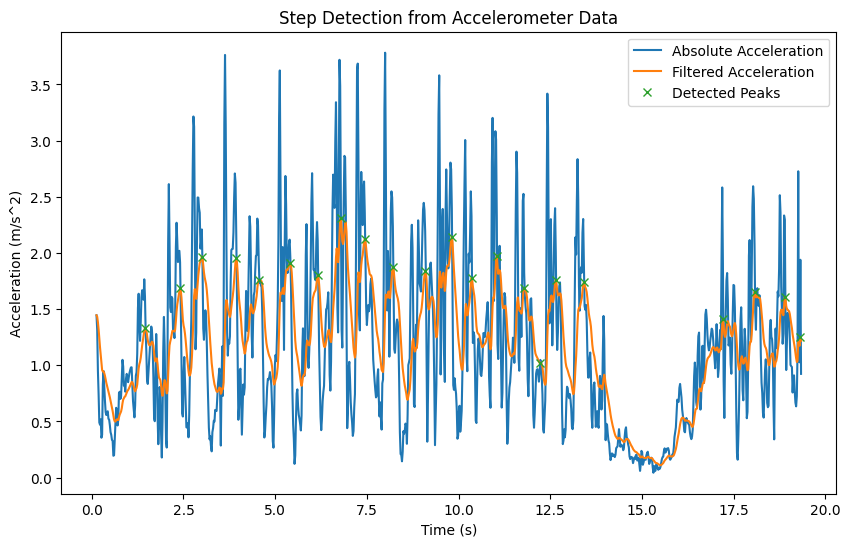

In [8]:
# Plot the data and detected peaks
plt.figure(figsize=(10, 6))
plt.plot(time, absolute_acceleration, label='Absolute Acceleration')
plt.plot(time, filtered_acceleration, label='Filtered Acceleration')
plt.plot(time[peaks], filtered_acceleration[peaks], "x", label='Detected Peaks')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Step Detection from Accelerometer Data')
plt.legend()
plt.show()

Peaks are an estimate of count

In [9]:
# Count the number of steps
num_steps = len(peaks)
print(f'Number of steps detected: {num_steps}')

Number of steps detected: 22


See the individual linear data

In [10]:
accerleration_x = data['Linear Acceleration x (m/s^2)'].values
accerleration_y = data['Linear Acceleration y (m/s^2)'].values
accerleration_z = data['Linear Acceleration z (m/s^2)'].values

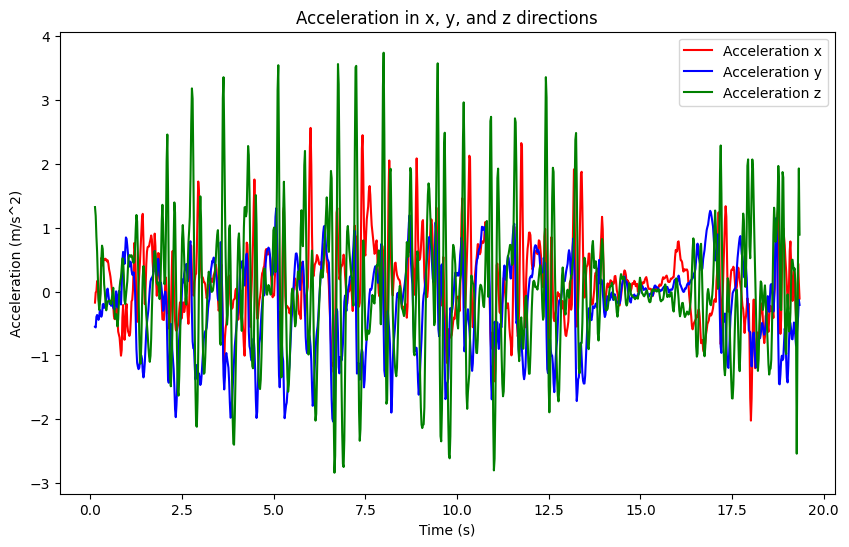

In [11]:

plt.figure(figsize=(10, 6))
plt.plot(time, accerleration_x, color='red', label='Acceleration x')
plt.plot(time, accerleration_y, color='blue', label='Acceleration y')
plt.plot(time, accerleration_z, color='green', label='Acceleration z')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration in x, y, and z directions')
plt.legend()
plt.show()
